# Assignmnet 3
# Marc-Antoine Provost
### IFT6758 Fall 2019

### Due date: Novemver 26, 2019

### Submit your answers and code individually as pdf files in gradescope.

### Algorithmic Discrimination [20 points]

This set of assingments will teach you the differences between various fairness measures. Note that this is not a programming assingment. 

Assume we have a Binary classifier to promote employees in an organization. The following table presents the Confusion Matrix for female and male employees: 


 Female | Actual positive | Actual negative |           
--- | --- | --- 
Predicted positve | 30 | 70 | 
Predicted negative | 20 | 105 | 


 Male | Actual positive | Actual negative 
--- | --- | ---
Predicted positve | 100 | 15 |
Predicted negative | 90 | 20 | 

1- Calculate the overall accuracy of the promotion classifier.

2- Calculate the accuracy of the promotion system for female and male employees.

3- Evaluate the pormotion system based on three fairness measures: Demographic parity, Equialized odds, and Equiality of opportunity.

4- Is this promotion model fair? if not, suggest an approach to make it fair. Justify your answer.


1) 
Accuracy = $\frac{TP + TN}{ TP + TN + FP + FN}$

Accuracy = $\frac{30 + 100 + 105 + 20}{ 30 + 100 + 105 + 20 + 70 + 15 + 20 + 90}$

Accuracy = 56.67 %



2) Female accuracy = $\frac{30 + 105}{ 30 + 105 + 20 + 70} $

Female accuracy = 60%

Male accuracy = $\frac{100 + 20}{ 100 + 20 + 90 + 15}$

Male accuracy = 53.33%

3) 
Demographic parity :  A classifier satisfies
this definition if subjects in both groups
have equal probability of being assigned to the positive predicted class. 

Female predicted positive : $\frac{100}{225} =  44.4$ %

Male predicted positive : $\frac{115}{225} = 51.1$ %

The promotion system doesn't achieve demographic parity since male and female do not have an equal probability of being assigned to the positive predicted class. 

Equal opportunity : 
A classifier satisfies this definition if both groups have equal false negative rate, i.e.,  the probability of a subject in a positive class to have a negative predictive value. 

Female FNR = $\frac{20}{50} = 40$%

Male FNR = $\frac{90}{190} = 47.37$ %

The promotion system does not achieve equal opportunity since the false negative rate is not the same for the females and males. 

Equalized odds : a classifier satisfies the definition if both groups have equal true positive rate and false positive rate. 

Female TPR = $\frac{30}{50} = 60$%

Male TPR = $\frac{100}{190} = 52.63$%

Because male and female do not have an equal true positive rate, the promotion system does not fulfill one of the requierments of equalized odds, thus the system does not acheive equalized odds. 



4) 
Based on the three fairness measure above, the model is not considered fair. To do so, we could do some pre-processing steps like sampling where we compare the expected size of a group (male or female) with its actual size, to define a sampling probability. 
We could also use in-processing constraints where we add a fairness measure in the optimization of our model. In other words, the model will learn its parameters in order to minimize the empirical risk, while being constrained by a fairness measure. In our example, we could add demographic parity as a fairness measure.

### Natural Language Processing [50 points]

This set of assignments will give you experience with a text corpus, Python programming, part-of-speech (PoS) tags, sentiment analysis, and machine learning with scikit-learn. 

This assignment shows how you can perform sentiment analysis on reviews using Python and [Natural Language Toolkit (NLTK)](https://www.nltk.org/).

Sentiment Analysis means analyzing the sentiment of a given text or document and categorizing the text/document into a specific class or category (like positive and negative). In other words, building a sentiment analysis model classifies any particular text or document as positive or negative. In the simplest form, the classification is done for two classes: positive and negative. However, we can add more classes like neutral, highly positive, highly negative, etc.

Sentiment analysis is an important topic in computational linguistics in which we quantify  subjective  aspects of language.  These aspects can range from biases in social media for marketing, to a spectrum of cognitive behaviours for disease diagnosis.

In this assignment, you learn about labeling data, extracting features, training classifier, and testing the accuracy of the classifier.

For this assignment, we use a reviews dataset as our labeled data which is collected from Yelp, Amazon, and IMDB. We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected. The review corpus contains reviews with sentiment polarity classification, where score is either 1 (for positive) or 0 (for negative). You can find the assignment data on the [website](https://github.com/ift6758/ift6758.github.io/blob/master/assignments/assignment_3(data).zip).

a) (Data processing): First create a list of all reviews and their categories. You can create a list of tuples where the first item is the review and the second item is the sentiment, i.e., '0' or '1'.

In [5]:
import pandas as pd
df = pd.read_csv('train.txt', sep='\t', error_bad_lines=False, dtype=str, header=None)
df.columns = ['Comment', 'Label']

df2 = pd.read_csv('test.txt', sep='\t', dtype=str, header=None)
df2.columns = ['Comment', 'Label']

train_data = list(df.itertuples(index=False, name=None))
test_data = list(df2.itertuples(index=False, name=None))

b'Skipping line 2087: expected 2 fields, saw 3\n'


b) (Tokenization): Extract all the words from the reviews. You can either use the string *split()* method directly or use the following method from NLTK.


In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

x_tokenized = [[] for i in range(len(train_data))]

for i in range(len(train_data)):
    x_tokenized[i] = word_tokenize(train_data[i][0].lower())
    
test_tokenized = [[] for i in range(len(test_data))]

for i in range(len(test_data)):
    test_tokenized[i] = word_tokenize(test_data[i][0].lower())

    
# I decided to lowercase every word so two similar word would not count as two different word if one was in lowercase
# and the other in uppercase (like the and The would now only be the and count as one word instead of two)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Calculate the number of occurence of each word in the entire corpus and report the 10 most common tokens. You can use the following method from NLTK.

In [8]:
from nltk.probability import FreqDist

allWords = []
for wordList in x_tokenized:
    allWords += wordList
    
fdist = FreqDist(allWords)
print(fdist)
fdist.most_common(10)

# that's only for training data

<FreqDist with 4903 samples and 34995 outcomes>


[('.', 2197),
 ('the', 1600),
 (',', 1115),
 ('and', 961),
 ('i', 875),
 ('a', 749),
 ('it', 662),
 ('is', 635),
 ('to', 568),
 ('this', 546)]

c) (Stop words removal): Remove all the stop words from the reviews and re-calculate the number of occurence of each word in the entire corpus.

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords 

punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
stopwords_english = stopwords.words('english')

allWords_stop = [word for word in allWords if word not in stopwords_english]
fdist2 = FreqDist(allWords_stop)
print("Version with punctuation", fdist2.most_common(10))

allWords_stop_punct = [word for word in allWords if word not in stopwords_english and word not in punctuation]
fdist3 = FreqDist(allWords_stop_punct)
print("Version without punctuation",fdist3.most_common(10))

# still only for the training data
# I decided to do 2 versions, one with punctuation and one without punctuation, because the frequence of punctuation is not relevant

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Version with punctuation [('.', 2197), (',', 1115), ('!', 414), ("n't", 233), ("'s", 216), ('good', 186), ('great', 169), ('movie', 153), ('phone', 141), ('film', 139)]
Version without punctuation [("n't", 233), ("'s", 216), ('good', 186), ('great', 169), ('movie', 153), ('phone', 141), ('film', 139), ('one', 121), ('0', 112), ('food', 98)]


d) (Stemmization): Normalize the reviews by stemming and re-calculate the number of occurence of each word in the entire corpus. You can use the following function from NLTK.

In [10]:
from nltk.stem import SnowballStemmer
 
stemmer_english = SnowballStemmer('english')
stemmed = [stemmer_english.stem(word) for word in allWords_stop]
fdist4 = FreqDist(stemmed)
print("Version with punctuation", fdist4.most_common(10))

stemmed_punc = [stemmer_english.stem(word) for word in allWords_stop_punct]
fdist5 = FreqDist(stemmed_punc)
print("Version without punctuation", fdist5.most_common(10))

# again here I did two versions, one with and one without punctuation

Version with punctuation [('.', 2197), (',', 1115), ('!', 414), ("n't", 233), ("'s", 216), ('good', 186), ('movi', 182), ('great', 170), ('film', 164), ('phone', 149)]
Version without punctuation [("n't", 233), ("'s", 216), ('good', 186), ('movi', 182), ('great', 170), ('film', 164), ('phone', 149), ('one', 124), ('work', 123), ('time', 115)]


e) (BOW): Create 1-hot encoding and represent each review as Bag of Words (BOW). 

In [0]:
# Build vocabulary and generate vectors
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 

def pre_processing(data):
    punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    comments = ['' for i in range(len(data))]
    for i in range(len(data)):
        comments[i] = [word for word in data[i] if word not in stopwords_english and word not in punctuation]
        comments[i] = ' '.join(comments[i])
        
    comments = [stemmer_english.stem(word) for word in comments]
    return comments

# I wrote a function that does all the pre-processing (remove stop-words and punctuation and stems the words).
# I also took the function CountVectorizer of scikit-learn which takes as input a string and converts it into a matrix of token counts (BOW) 

In [0]:
# apply the pre_processing function on the previously tokenized sentences (both train and test so it can be used as an input in our model)
comments_train = pre_processing(x_tokenized)
comments_test = pre_processing(test_tokenized)


In [0]:
# the vocabulary is built with the training data by calling vectorizer.fit
vectorizer = CountVectorizer(lowercase=False)
x_train = vectorizer.fit_transform(comments_train)
x_test = vectorizer.transform(comments_test)

y_train = [0 for i in range(len(train_data))]
for i in range(len(train_data)):
    y_train[i] = train_data[i][1]

y_test = [0 for i in range(len(test_data))]
for i in range(len(test_data)):
    y_test[i] = test_data[i][1]

In [62]:
print('x_train is a sparse matrix of shape', x_train.shape, ', which is the number of reviews in the training set times the number of unique tokens')

x_train is a sparse matrix of shape (2307, 4838) , which is the number of reviews in the training set times the number of unique tokens


In [63]:
# example of a review in a BOW representation
print('If we take the second review in the training set where we applied the pre_processing function, it gives us :', comments_train[1])
print('Represented in a BOW format, it has a 1 at these indexes : \n', x_train[1], '\n and 0 everywhere else.')
print('It can be shown as', x_train[1].toarray(), 'and we can see that indeed at its index 1884 it has a value of', x_train[1, 1884])

If we take the second review in the training set where we applied the pre_processing function, it gives us : good case excellent valu
Represented in a BOW format, it has a 1 at these indexes : 
   (0, 1884)	1
  (0, 661)	1
  (0, 1501)	1
  (0, 4574)	1 
 and 0 everywhere else.
It can be shown as [[0 0 0 ... 0 0 0]] and we can see that indeed at its index 1884 it has a value of 1


f) (Train a Classifier): Use reviews in the train folder as "train-set" and use reviews in the test folder as "test-set". Use Naive Bayes Classifer to train your sentiment predictor. You can use the following code for this purpose.

In [64]:
from sklearn.naive_bayes import GaussianNB
 
classifier = GaussianNB().fit(x_train.toarray(), y_train)
predict = classifier.predict(x_test.toarray())

score = classifier.score(x_test.toarray(), y_test)
print(score)

# I chose the Naive Bayes classifier from scikit-learn because I am more familiar with it and when asked, the teacher said we could. 

0.6400911161731208


g) (N-gram): There are different n-grams like unigram, bigram, trigram, etc. For example, Bigram = Item having two words, such as, very good. BOW and unigram representation as the same.

Extract Bigram features from the reviews and re-train the model with Naive Bayes classifier on the train-set and report accuracy on the test-set. You can use the following method from NLTK to extract bigrams.

In [65]:
# Here is specify that I want bi-grams in the CountVectorizer function
vectorizer = CountVectorizer(lowercase=False, ngram_range =(2,2))
x_train2 = vectorizer.fit_transform(comments_train)
x_test2 = vectorizer.transform(comments_test)

classifier2 = GaussianNB().fit(x_train2.toarray(), y_train)
predict = classifier2.predict(x_test2.toarray())

score = classifier2.score(x_test2.toarray(), y_test)
print(score)

0.6059225512528473


h) (Combined features): Represent each review based on the combination of 2000 most frequent unigram and bi-grams. Re-train the Naive Bayes Classifier and report the accuracy.

In [66]:
# Within the function CountVectorizer, I specify that I want to include the 2000 most frequent unigram and bi-grams.
vectorizer = CountVectorizer(lowercase=False, ngram_range =(1,2), max_features=2000)
x_train3 = vectorizer.fit_transform(comments_train)
x_test3 = vectorizer.transform(comments_test)

classifier3 = GaussianNB().fit(x_train3.toarray(), y_train)
predict = classifier3.predict(x_test3.toarray())

score = classifier3.score(x_test3.toarray(), y_test)
print(score)

0.6332574031890661


# I also tried all the unigram classifier from above with nltk because I thought my score was low

In [0]:
# nltk implementation
from collections import Counter
import numpy as np 

vocabulary = list(fdist5.keys())

def make_dictionnary(corpus, vocabulary):
  vocabulary = set(vocabulary)
  data = []
  for review in corpus:
    counter = Counter(word for word in review if word in vocabulary)
    data.append(dict(counter))
  data = np.asarray(data)
  return data

# create a corpus w/o stopwords and punctuation
def create_corpus(data, tokenized_data):
  stopwords_english = set(stopwords.words('english'))
  punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~+'''
  corpus_wo_stop_words = [[] for i in range(data.shape[0])]

  for idx, review in enumerate(tokenized_data):
    wr = []
    for word in review:
      if word not in stopwords_english and word not in punctuation:
        wr.append(word)
    corpus_wo_stop_words[idx] = wr
  return corpus_wo_stop_words

In [0]:
corpus_wo_stop_words = create_corpus(x_train, x_tokenized)
corpus_test = create_corpus(x_test, test_tokenized)

dict_train_x = make_dictionnary(corpus_wo_stop_words, vocabulary)
dict_test_x = make_dictionnary(corpus_test, vocabulary)

In [84]:
# accuracy with unigram and nltk
from nltk import NaiveBayesClassifier
from sklearn.metrics import accuracy_score

classifier = NaiveBayesClassifier.train(zip(dict_train_x, y_train))

y_predicted = []
for i in dict_test_x:
  y_predicted.append(classifier.classify(i))

accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

0.7289293849658315


### Dense representation with SVD [ Bonus point: 10  points]

i) Generate a co-occurance matrix with window size = 2. Represent each revew with a dense vector extracted from SVD where dimention = 300. Re-train the model and report the accuracy on the test-set.

For this part, I took my inspiration from the first assignment of the course CS 224N from Standford ; http://web.stanford.edu/class/cs224n/

In [0]:
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import numpy as np

In [0]:
# first get all the unique words in the corpus and the number of unique words in the corpus
def distinct_words(corpus):
  corpus_words = []
  num_corpus_words = -1
  corpus_words = [word for line in corpus for word in line]
  corpus_words_set = set(corpus_words)
  corpus_words = sorted(list(corpus_words_set))
  num_corpus_words = len(corpus_words)

  return corpus_words, num_corpus_words

In [0]:
# function for the co_occurence matrix
def co_occurrence_matrix(corpus, window_size=2):
  words, num_words = distinct_words(corpus)
  M = None
  word2Ind = {}

  for i in range(num_words):
      word2Ind[words[i]] = i
  M = np.zeros((num_words, num_words))
  for line in corpus:
      for i in range(len(line)):
          target = line[i]
          target_index = word2Ind[target]
          
          left = max(i - window_size, 0)
          right = min(i + window_size, len(line) - 1)
          for j in range(left, i):
              window_word = line[j]
              M[target_index][word2Ind[window_word]] += 1
              M[word2Ind[window_word]][target_index] += 1

  return M, word2Ind

In [0]:
# function to reduce the dimensions of the co-occurence matrix to 300
def reduce_to_k_dim(M, k=300):
  n_iters = 10
  M_reduced = None
  print("Running Truncated SVD over %i words..." % (M.shape[0]))
  svd = TruncatedSVD(n_components = k, n_iter = n_iters, random_state = 123, tol = 0.0)
  M_reduced = svd.fit_transform(M)
  print(M_reduced.shape)

  print("Done.")
  return M_reduced

In [94]:
M, word2Ind = co_occurrence_matrix(corpus_wo_stop_words)
M_reduced = reduce_to_k_dim(M, k=300)

Running Truncated SVD over 4763 words...
(4763, 300)
Done.


In [95]:
M_test, word2Ind_test = co_occurrence_matrix(corpus_test)
M_test_reduced = reduce_to_k_dim(M_test, k=300)

Running Truncated SVD over 1490 words...
(1490, 300)
Done.


In [0]:
# Because the reduced matrix is of 4763x300 and I want a matrix of 2307x300, I decided to average the word embeddings of a sentence
# to represent a review. I.e, the first sentence is the average embeddings of the words contained in the sentence.

def get_good_matrix(corpus, data, reduced_matrix):
  M_good_shape = np.zeros((data.shape[0], 300))
  # pour chaque ligne
  for idx, line in enumerate(corpus):
    # calcule le nombre de mots
    n_words = len(line)
    # pour chaque mot dans la ligne
    for j in range(n_words):
      M_good_shape[idx] += reduced_matrix[j]
      M_good_shape[idx] = M_good_shape[idx] / n_words
  
  return M_good_shape

In [0]:
M_reduced2 = get_good_matrix(corpus_wo_stop_words, x_train, M_reduced)
M_test_reduced2 = get_good_matrix(corpus_test, x_test, M_test_reduced)

In [98]:
from sklearn.naive_bayes import GaussianNB
 
classifier = GaussianNB().fit(M_reduced2, y_train)
predict = classifier.predict(M_test_reduced2)

score = classifier.score(M_test_reduced2, y_test)
print(score)

# weirdly enough, I get a lower score when I average the n_lines of M_reduced instead
# of summing the n lines corresponding to the n words in the review. 

0.46924829157175396


### Word Embeddings [Bonus point: 25 points]



Download pretrained word embeddings from Google News dataset. The model includes embeddings for 3 million words and phrases. Words with frequency below 5 were discarded. Download the model from the link below: https://code.google.com/archive/p/word2vec/

You can load the model using gensim:


In [86]:
import gensim.downloader as api
path_word2vec = api.load("word2vec-google-news-300", return_path=True)
print(path_word2vec)

[================================================--] 96.9% 1611.1/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [87]:
from gensim.models import KeyedVectors
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format(path_word2vec, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [85]:
classifier.show_most_informative_features(10)

Most Informative Features
                   worst = 1                   0 : 1      =     19.2 : 1.0
                   great = 1                   1 : 0      =     18.3 : 1.0
                   money = 1                   0 : 1      =     17.8 : 1.0
                     bad = 1                   0 : 1      =     13.1 : 1.0
                    fine = 1                   1 : 0      =     12.9 : 1.0
                 perfect = 1                   1 : 0      =     10.2 : 1.0
                    nice = 1                   1 : 0      =      8.9 : 1.0
                  return = 1                   0 : 1      =      7.7 : 1.0
                    love = 1                   1 : 0      =      7.1 : 1.0
                    slow = 1                   0 : 1      =      7.1 : 1.0


j) Represent the 5 most positive informative words with word2vec (dimention = 300) and SVD. 

k) Represent the 5 most negative informative words with word2vec (dimention = 300) and SVD. 



In [0]:
#words, num_words = distinct_words(corpus_wo_stop_words)

positive_words = ['great', 'fine', 'perfect', 'nice', 'love']
negative_words = ['worst', 'money', 'bad', 'return', 'slow']

positive_svd = np.asarray([M_reduced2[vocabulary.index(word)] for word in positive_words])
negative_svd = np.asarray([M_reduced2[vocabulary.index(word)] for word in negative_words])

model_positive = model[positive_words]
model_negative = model[negative_words]


You can use the following code to determine which features are most effective in sentiment analysis.

l) Calculate the dot product between the most frequent positve word and the most frequent negative word represented with SVD and word2Vec. Compare the results.

m) Can one use word2vec for sentiment analysis on the review dataset? Justify your answer.

### Computer Vision [30 points]

This assignment will give you experience with an image corpus. For most of the questions in this assingment, you need to write a python script.


1- *Read image*: Write a python code to read the image. You can find the image of this assingment on the [webpage](https://github.com/ift6758/ift6758.github.io/blob/master/assignments/assignment_3(data).zip).


In [0]:
#write a function to read an image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('lena.jpg')

2- *Pre-processing*: data augmentation: Write a python code to resize the image and make it 20% smaller, and save the image as greyscale image.


In [0]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# re-size an image
re_sized = cv2.resize(gray_img, (0,0), fx=0.2, fy=0.2)
# save the processed image in grayscale
cv2.imwrite('gray_lena.jpg', re_sized)


True

3- *Filter*: Write a python code that load the image in RGB and generate three images where in each one the colors of one channel is inversed. Show the generated images.

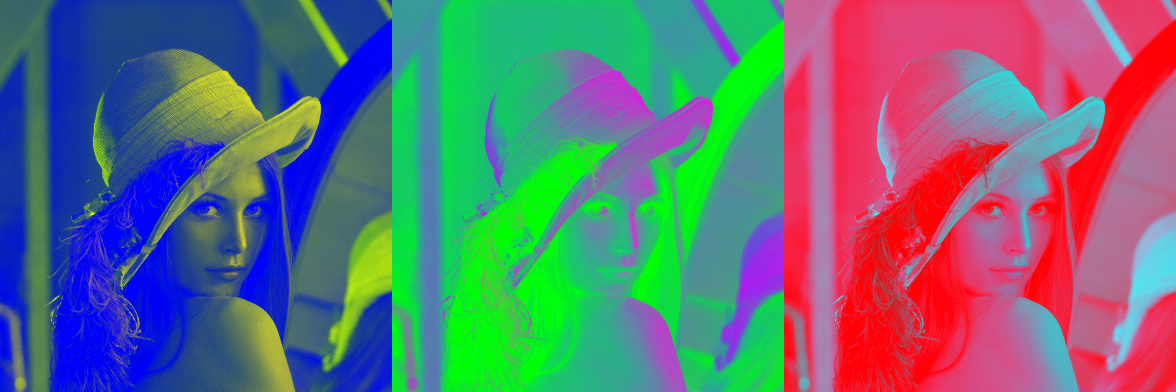

In [0]:
import numpy as np
# load image in RGB
img = cv2.imread('lena.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def invert_channel(img, channel):
  image = np.copy(img)
  image[:,:, channel] = abs(255 - image[:,:, channel])
  return image

r_inverted = cv2.resize(invert_channel(rgb_img, 0), (0,0), fx=0.2, fy=0.2)
g_inverted = cv2.resize(invert_channel(rgb_img, 1), (0,0), fx=0.2, fy=0.2)
b_inverted = cv2.resize(invert_channel(rgb_img, 2), (0,0), fx=0.2, fy=0.2)
lena_inv = cv2.hconcat((r_inverted, g_inverted, b_inverted))
cv2_imshow(lena_inv)

# decided to resize the images so they could fit in google colab's window

4- Suggest a filter that make the image 50% lighter and 50% darker. Write a python function that applies the filter on the image. 

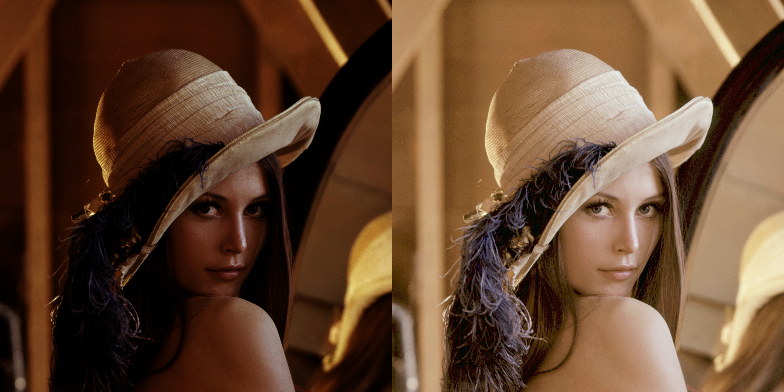

In [0]:
def adjust_gamma(image, gamma=1.0):
  invGamma = 1.0 / gamma
  table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
  return cv2.LUT(image, table)


darker = cv2.resize(adjust_gamma(img, gamma=0.5), (0,0), fx=0.2, fy=0.2)
lighter = cv2.resize(adjust_gamma(img, gamma=1.5), (0,0), fx= 0.2, fy=0.2)

lena_tone = cv2.hconcat((darker, lighter))
cv2_imshow(lena_tone)


5-  Write two python functions that apply a 3 x  3 median and 3 x  3 mean filter on the image. Mean filter is a simple sliding window that replace the center value with the average of all pixel values in the window. While median filter is a simple sliding window that replace the center value with the Median of all pixel values in the window. Note that the border pixels remain unchanged.


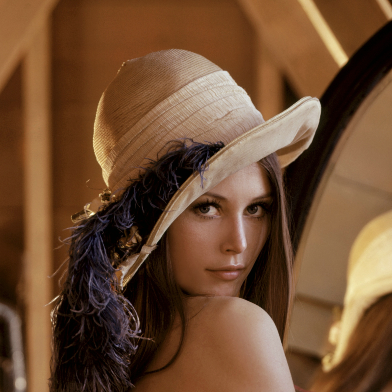

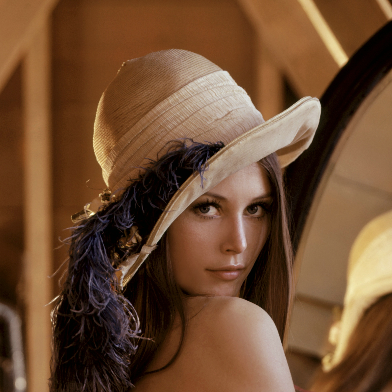

In [0]:
import numpy as np

def mean_filter(img):
  # apply 3 x  3 mean filter  
  image = cv2.imread('lena.jpg')
  kernel = np.ones((3,3),np.float32)/9
  dst = cv2.filter2D(image,-1,kernel)
  dst = cv2.resize(dst, (0,0), fx=0.2, fy=0.2)
  return cv2_imshow(dst) 

def median_filter(img):
  # apply 3 x  3 median filter
  image = cv2.imread('lena.jpg')
  median = cv2.medianBlur(image, 3)
  median = cv2.resize(median,(0,0), fx=0.2, fy=0.2)
  return cv2_imshow(median) 

mean_filter('lena.jpg')   
median_filter('lena.jpg')

6- A mean filter is a linear filter, but a median filter is not. Why?

If we have a function F, the function is said to be linear if F(A + B) = F(A) + F(B). 

Such equation is not satisfied for a nonlinear filter like a median filter. This can be expressed by an example. 

If we denote A = [1, 2, 1, 3] and B = [4, 5, 6, 5], then mean(A) = 1.75, mean(B) = 5 and mean(A + B) = 6,75 = mean(A) + mean(B) 

Instead if we do : 
median(A) = 1.5
median(B) = 5
median(A + B) = 7 != median(A) + median(B)

Thus, a median filter is a nonlinear filter.